# Case Study: JWST & GAIA

NASA's [James Webb Space Telescope](https://science.nasa.gov/mission/webb/)
(JWST) and ESA's [Gaia](https://www.esa.int/Science_Exploration/Space_Science/Gaia) 
star surveyor both orbit the Earth-Sun Lagrange Point \#2. How close do the two
spacecraft get to one another? How do their orbits compare? Simple ephemeris
queries to the Horizons ephemeris platform can answer these questions!

First, let's fetch Cartesian state vector data for Earth, JWST, and Gaia with
respect to the Sun. We can do so using `HorizonsEphemeris.ephemeris`, which 
is re-exported by `EphemerisSources.jl`.

In [10]:
using EphemerisSources
using AstroTime, Dates

start = AstroTime.TTEpoch(now())
stop = start + 1years
step = "1 day"
wrt = "SEMB-L2"
units = "KM-S"

earth = ephemeris("earth", start, stop, step; wrt = wrt, units = units)
JWST = ephemeris("jwst", start, stop, step; wrt = wrt, units = units)
GAIA = ephemeris("gaia", start, stop, step; wrt = wrt, units = units)
nothing # hide

By plotting all three bodies' orbits about the Sun, we can see that Gaia has 
a much larger orbit than JWST.

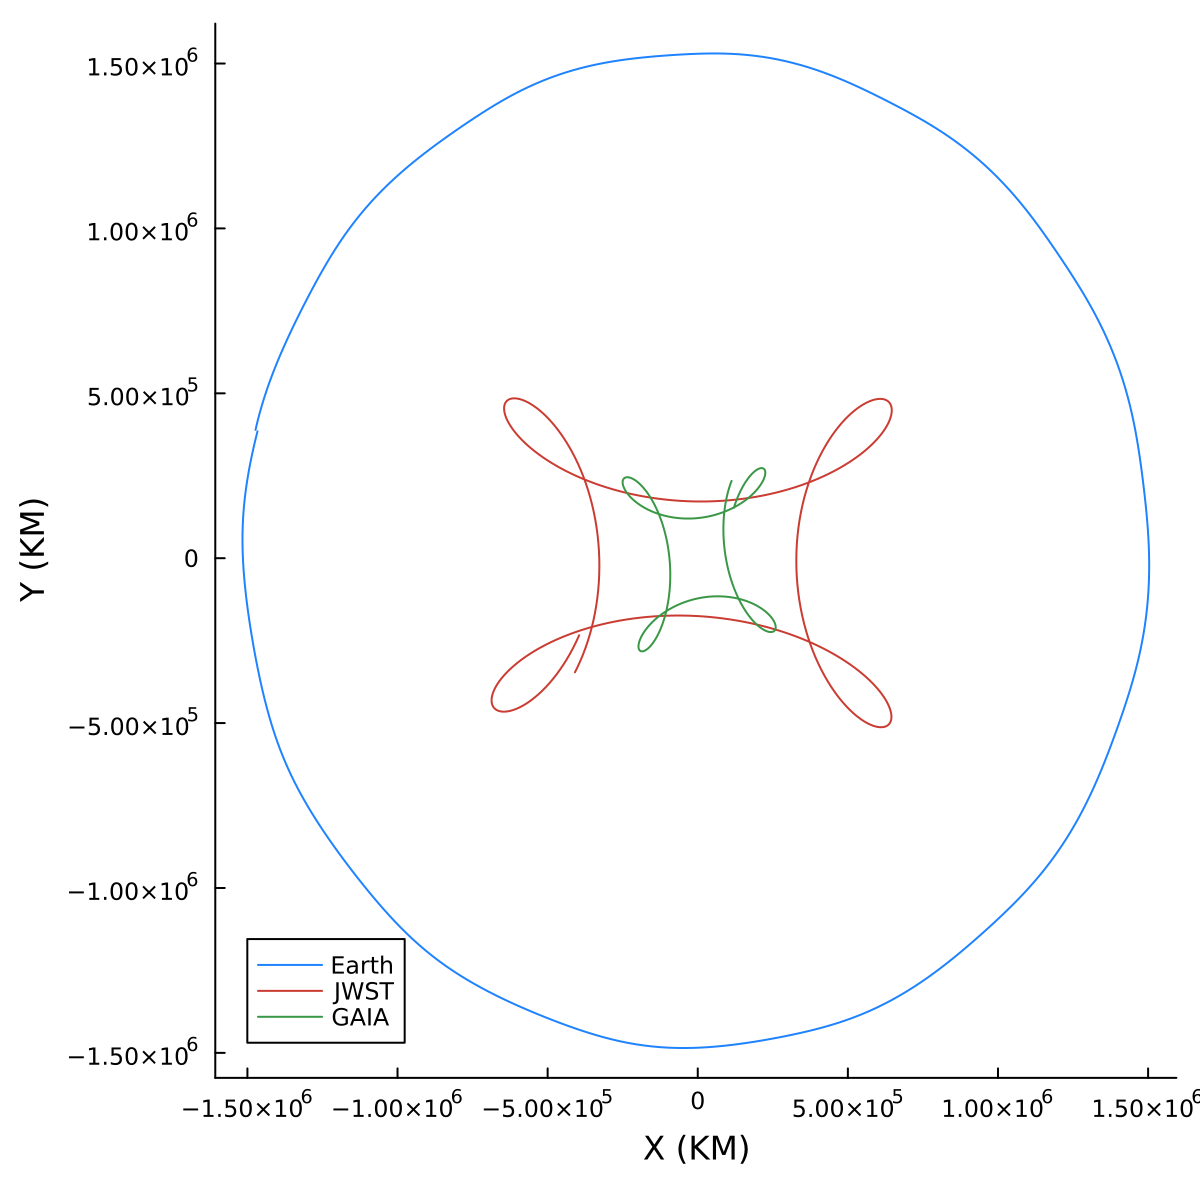

In [11]:
using Plots

artsy = (;
    grid = false,
    title = "",
    markersize = 8,
    palette = :julia,
    dpi = 200,
    size = (600, 600),
    xlabel = "X (KM)",
    ylabel = "Y (KM)",
)

fig = plot(; artsy...)
plot!(fig, earth.x, earth.y, label = "Earth")
plot!(fig, JWST.x, JWST.y, label = "JWST")
plot!(fig, GAIA.x, GAIA.y, label = "GAIA")

But what is the closest approach distance between the two spacecraft? We can all
breathe easy: they aren't close to colliding in the next year!

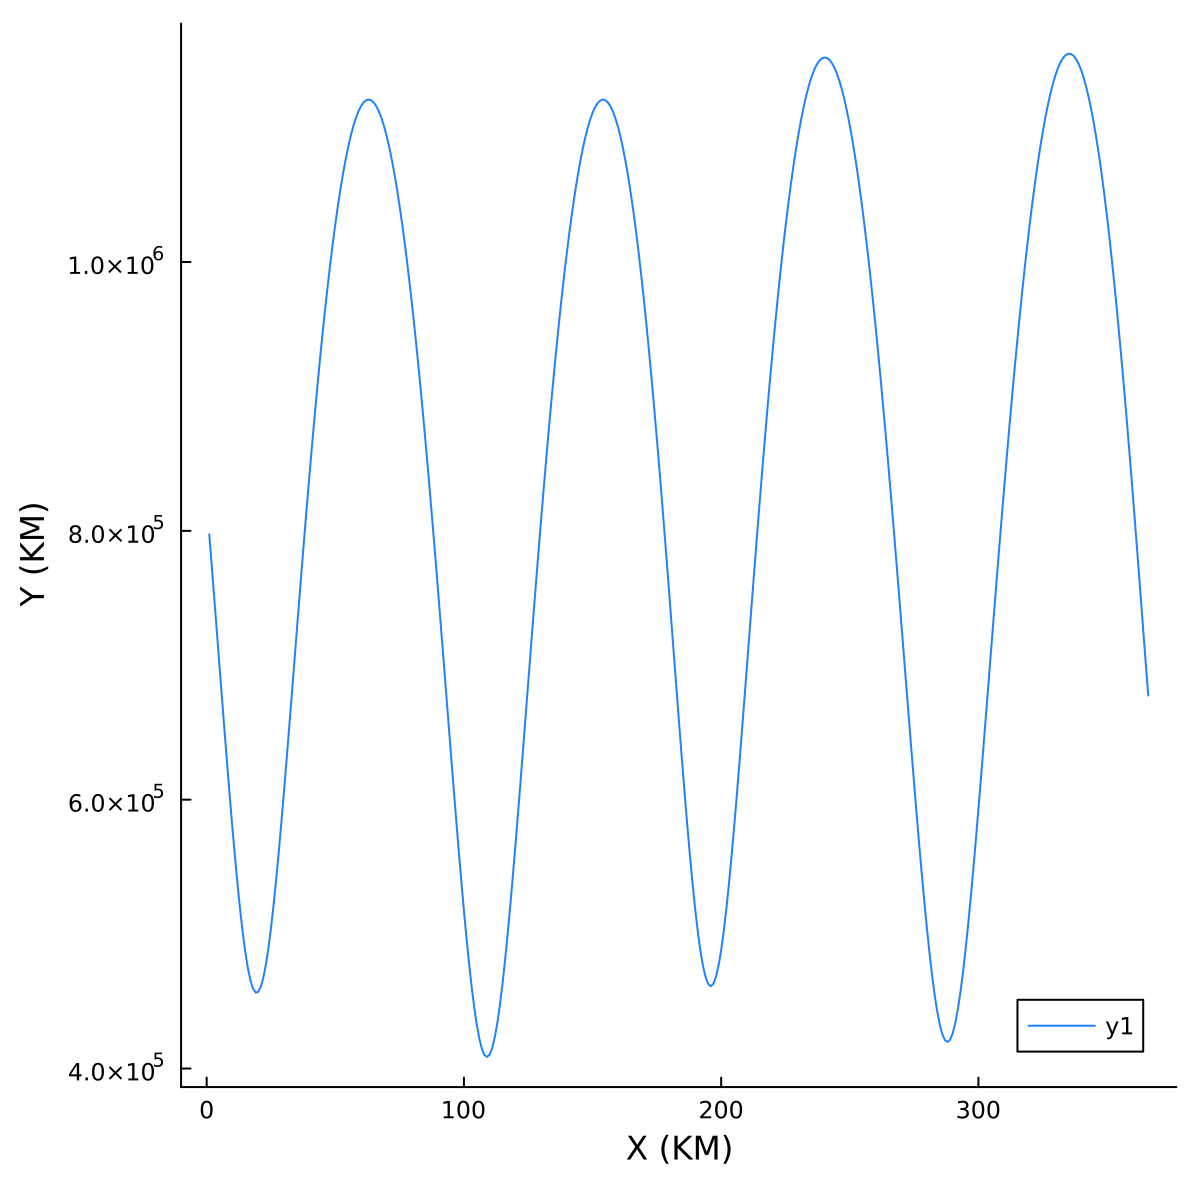

In [12]:
using Dates

distance(x, y, z) = sqrt(x^2 + y^2 + z^2)

plot(
    collect(1:length(earth.cal)),
    @. distance(JWST.x - GAIA.x, JWST.y - GAIA.y, JWST.z - GAIA.z);
    xlabel = "Days",
    ylabel = "Distance (KM)",
    artsy...,
)